In [16]:
#引入需要的库
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams  ## run command settings for plotting
import pandas as pd
from sklearn.model_selection import train_test_split

In [17]:
#设置画图参数
config = {
    "mathtext.fontset":'stix',
    "font.family":'serif',
    "font.serif": ['SimHei'],
    "font.size": 10,   # 字号
    'axes.unicode_minus': False # 处理负号
}
rcParams.update(config)

In [18]:
## 读取数据
path = 'D:\\机器学习\\代码\\Assignment\\assigment3\\regress_data1.csv'
data = pd.read_csv(path) ## data 是dataframe 的数据类型
cols = data.shape[1]
X_data = data.iloc[:, :cols-1]#X是所有行，去掉最后一列， 未标准化
y_data = data.iloc[:, cols-1:]#X是所有行，最后一列
X = X_data.values
Y = y_data.values

In [19]:
#将数据集划分为训练数据集和测试数据集
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=40)

In [20]:
#提前保留x_train的均值和方差
mean = x_train.mean()
std = x_train.std()

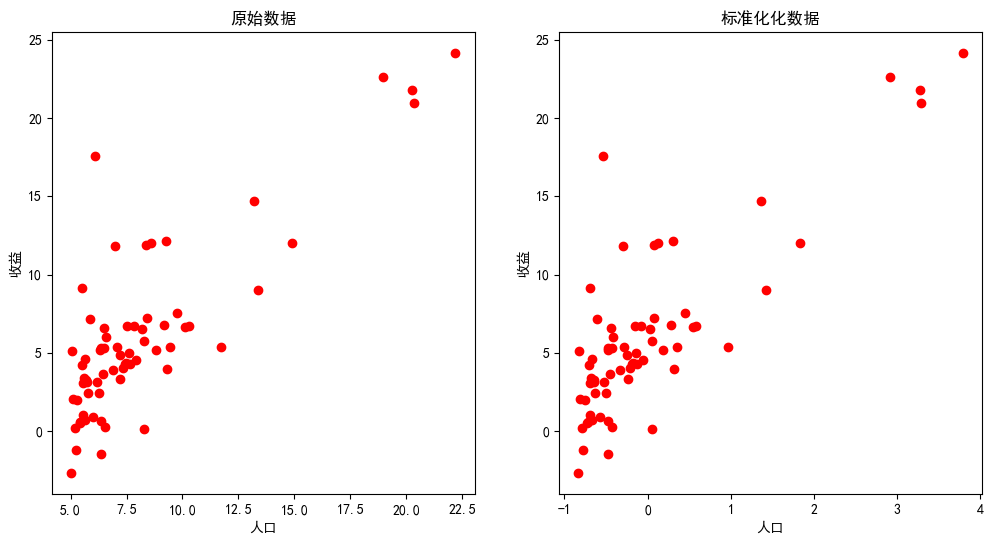

In [21]:
#对训练数据集归一化并画图观察其变化
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x_train, y_train, 'ro')
plt.title('原始数据')
plt.xlabel('人口')
plt.ylabel('收益')
x_train = (x_train - mean) / std
plt.subplot(1, 2, 2)
plt.plot(x_train, y_train, 'ro')
plt.title('标准化化数据')
plt.xlabel('人口')
plt.ylabel('收益')
plt.show()

In [22]:
#利用训练集的均值和方差标准化测试数据
x_test = (x_test - mean) / std

In [23]:
#定义损失函数
lambda_ = 0.001
def computeCost(X, Y, W, b):
    Y_hat = X @ W + b
    loss = np.sum((Y_hat - Y) ** 2) / (2 * X.shape[0]) + (lambda_ / 2) * np.sum(W ** 2)
    return loss

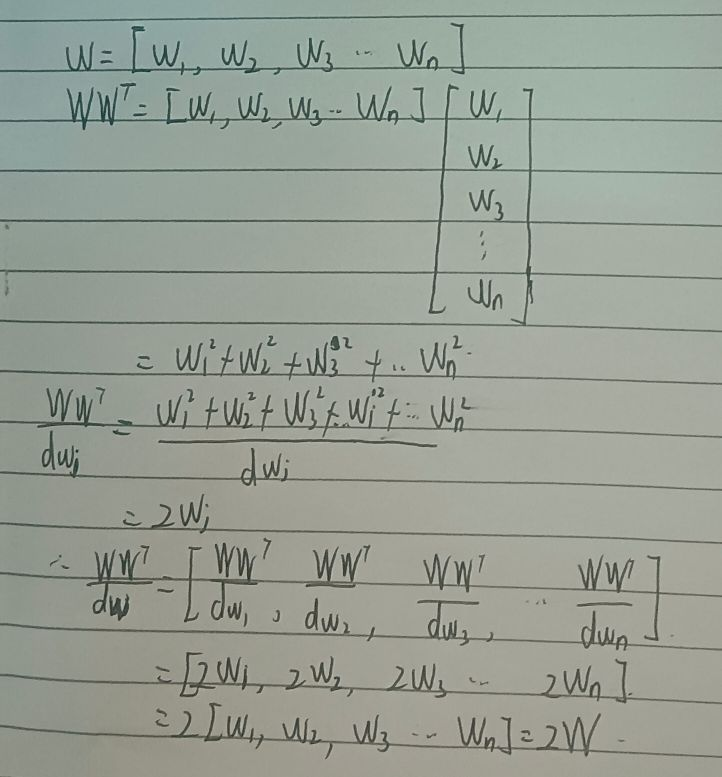

In [24]:
#随机梯度下降
def gradientDescent(X, Y, W, b, alpha):
    Y_hat = X @ W + b
    dW = (1 / X.shape[0]) * np.dot(X.T, (Y_hat - Y)) + lambda_ * W
    db = (1 / X.shape[0]) * np.sum(Y_hat - Y)
    W += -alpha * dW
    b += -alpha * db
    return W, b

In [25]:
#定义线性模型
def linearRegression(X, Y, alpha, iters):
    Ws = []
    bs = []
    feature_dim = X.shape[1]
    W = np.zeros((feature_dim, 1))
    b = 0.0
    for i in range(iters):
        W, b = gradientDescent(X, Y, W, b, alpha)
        tw = W.copy()
        tb = b.copy()
        Ws.append(tw)
        bs.append(tb)
    return  Ws, bs  ## 模型参数。

In [26]:
def predict(X, W, b):
    y_pre = X @ W + b
    return y_pre

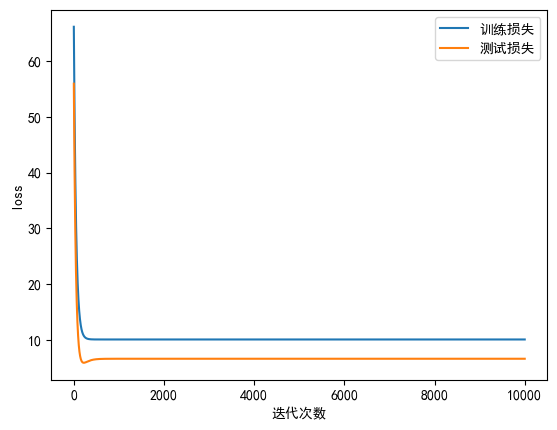

In [27]:
#画训练损失和测试损失图像
alpha = 0.01
iters = 10000
Ws, bs = linearRegression(x_train, y_train, alpha, iters)
loss_train = []
loss_test = []
for i in range(iters):
    loss_train.append(np.sum((predict(x_train, Ws[i], bs[i]) - y_train)**2)/x_train.shape[0])
    loss_test.append(np.sum((predict(x_test, Ws[i], bs[i]) - y_test)**2)/x_test.shape[0])
iter = np.arange(iters)
plt.plot(iter, loss_train, label='训练损失')
plt.plot(iter, loss_test, label='测试损失')
plt.legend()
plt.xlabel('迭代次数')
plt.ylabel('loss')
plt.show()

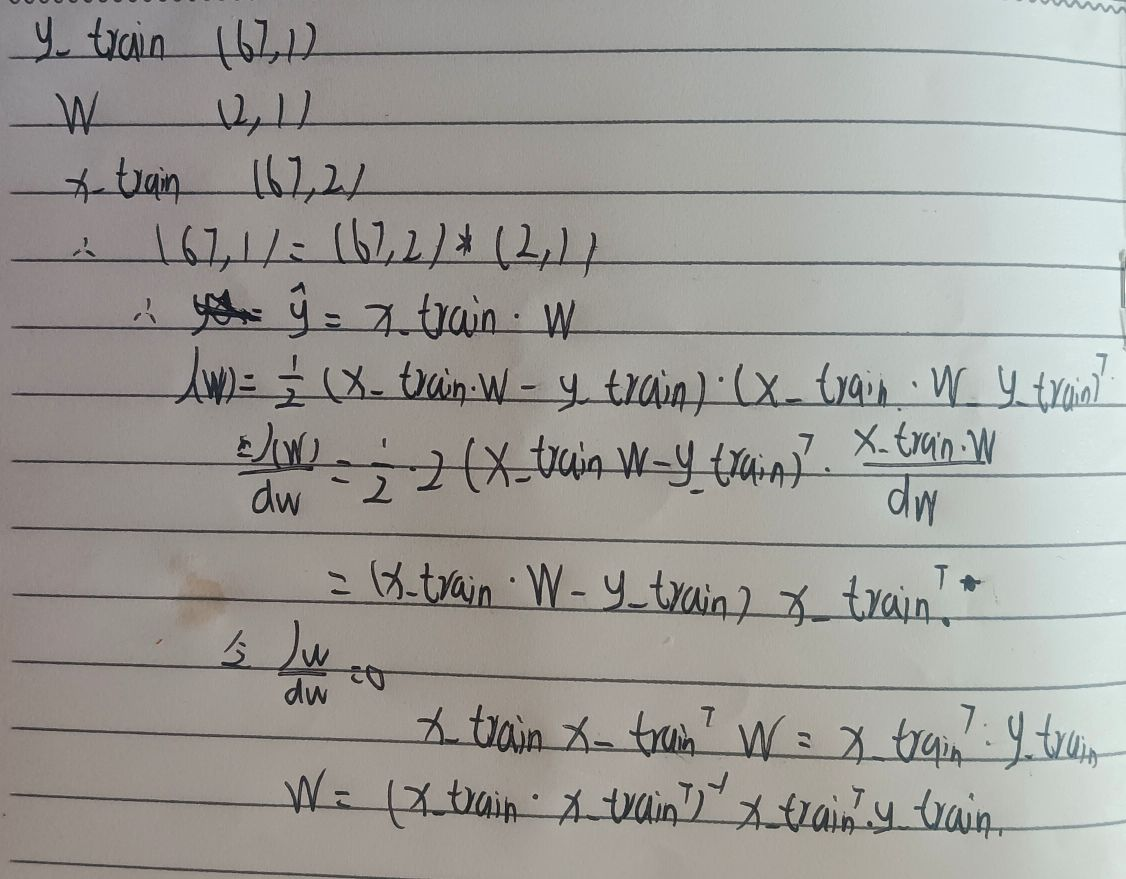

In [28]:
#利用最小二乘法求解W
w_lsq = np.linalg.inv(x_train.T @ x_train) @ x_train.T @ y_train
b_lsq = np.sum(y_train - x_train * w_lsq)/x_train.shape[0]

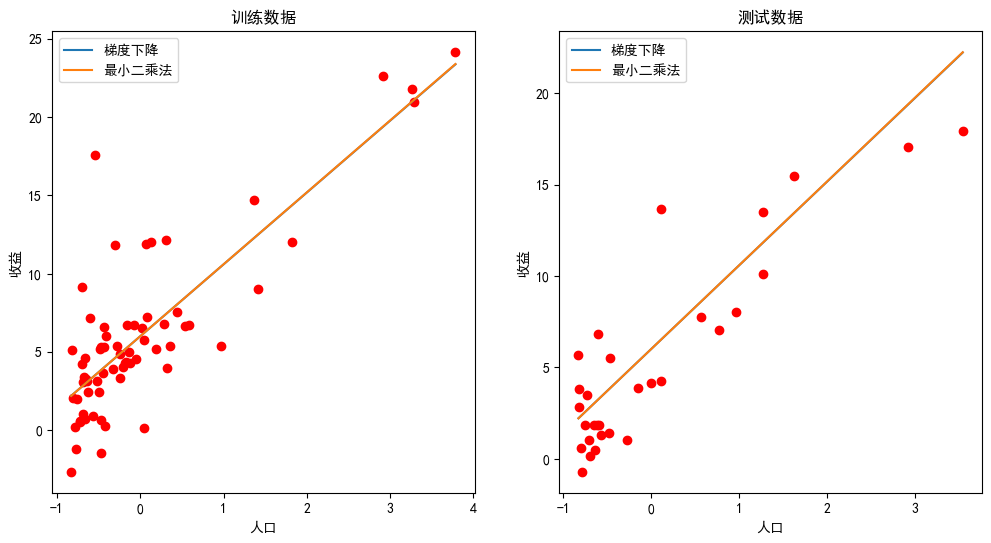

In [30]:
#比较最小二乘法和随机梯度下降分别在训练数据集和测试数据集的拟合情况
xx_test = np.linspace(x_test.min(), x_test.max(), 100)
yy_test = bs[len(bs)-1] + Ws[len(Ws)-1][0] * xx_test
ylsq_test = b_lsq + w_lsq[0] * xx_test
xx_train = np.linspace(x_train.min(), x_train.max(), 100)
yy_train = bs[len(bs)-1] + Ws[len(Ws)-1][0] * xx_train
ylsq_train = b_lsq + w_lsq[0] * xx_train
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x_train, y_train, 'ro')
plt.plot(xx_train,  yy_train, label='梯度下降')
plt.plot(xx_train, ylsq_train, label='最小二乘法')
plt.legend()
plt.title('训练数据')
plt.xlabel('人口')
plt.ylabel('收益')
plt.subplot(1, 2, 2)
plt.plot(x_test, y_test, 'ro')
plt.plot(xx_test, yy_test, label='梯度下降')
plt.plot(xx_test, ylsq_test, label='最小二乘法')
plt.legend()
plt.title('测试数据')
plt.xlabel('人口')
plt.ylabel('收益')
plt.show()